In [1]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException    
from urllib import request
from PIL import Image
from PIL import ImageFilter
import os
from subprocess import check_output
import pytesseract
import cv2
import numpy as np
from matplotlib import pyplot as plt
import unidecode

%matplotlib inline

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
image_name = 'captcha.jpg'

In [3]:
vehicle_number = 'MH03CP7959'

In [4]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument("--test-type")

driver = webdriver.Chrome(options=options)

In [5]:
url = 'http://vahan.nic.in/nrservices/faces/user/jsp/SearchStatus.jsp'
driver.get(url)

In [6]:
image_element = driver.find_element_by_xpath('//img[contains(@src,"cap")]')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//img[contains(@src,"cap")]"}
  (Session info: chrome=75.0.3770.142)


In [ ]:
location = image_element.location 
size = image_element.size
driver.save_screenshot('screenshot.png')

In [ ]:
left = location['x']    
top = location['y']    
right = location['x'] + size['width']    
bottom = location['y'] + size['height']

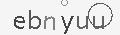

In [15]:
image_file = '../input/captcha.jpg'
image = Image.open(image_name)
image

cebnyuw


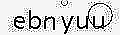

In [18]:
image = Image.open(image_name)
# image = image.crop((left, top, right, bottom))
image = image.convert('L')
image = image.filter(ImageFilter.EDGE_ENHANCE)
image = image.filter(ImageFilter.SHARPEN)
captcha_text = pytesseract.image_to_string(image)
captcha_text = unidecode.unidecode(captcha_text)
captcha_text = ''.join(e for e in captcha_text if e.isalnum())
print(captcha_text)
image.save('loaded_captcha.png')
image

In [9]:
def prepare_image(img):
    """Transform image to greyscale and blur it"""
    img = img.filter(ImageFilter.EDGE_ENHANCE)
    img = img.filter(ImageFilter.SMOOTH_MORE)
    img = img.filter(ImageFilter.SMOOTH_MORE)
    
    if 'L' != img.mode:
        img = img.convert('L')
    return img

def remove_noise(img, pass_factor):
    for column in range(img.size[0]):
        for line in range(img.size[1]):
            value = remove_noise_by_pixel(img, column, line, pass_factor)
            img.putpixel((column, line), value)
    return img

def remove_noise_by_pixel(img, column, line, pass_factor):
    if img.getpixel((column, line)) < pass_factor:
        return (0)
    return (255)
image = Image.open(image_name)
image_processed = prepare_image(image)
image_processed = remove_noise(image_processed, 130)
captcha_text = pytesseract.image_to_string(image_processed)
print(captcha_text)

ebnyuu


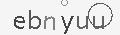

In [10]:
image

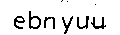

In [11]:
image_processed

In [12]:
captcha_text

'ebnyuu'

True

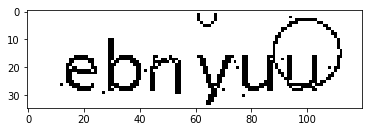

In [19]:
# importa a biblioteca do opencv
import cv2
import matplotlib.pyplot as plt

# carrega a imagem colorida e transforma ela em uma matriz do numpy
image = cv2.imread('loaded_captcha.png')
# calcula o pixel com menor intensidade
# inicia a cor com o maior valor possivel
color = 255 * 3

# pega as dimensoes da imagem
(rows, cols, depth) = image.shape

# varre todos os pixels
for row in range(rows):
    for col in range(cols):

        # acessa um pixel da imagem
        pixel     = image[row][col]
        (r, g, b) = pixel.tolist()

        if color > (r + g + b):
            color = r + g + b

for row in range(rows):
    for col in range(cols):
        pixel = image[row][col]
        (r, g, b) = pixel.tolist()
        c = (r + g + b)

        # pinta de branco o que nao for letra
        if c != color:
            image[row][col] = (255, 255, 255)
        # pinta de preto o que for letra
        else:
            image[row][col] = (0, 0, 0)
            
plt.imshow(image)
filename = "filtered_captcha.png"
cv2.imwrite(filename, image)

In [20]:
image = Image.open('filtered_captcha.png')
captcha_text = pytesseract.image_to_string(image)
captcha_text

'ebnyuw'